In [1]:
pip install torch torchvision torchaudio


Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install transformers






In [3]:
pip install tf-keras


Note: you may need to restart the kernel to use updated packages.


In [4]:
import sys
print(sys.executable)


C:\Users\ansh4\anaconda3\anaconda\python.exe


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping


In [6]:
df = pd.read_csv(r'C:\Users\ansh4\Downloads\major project\malicious_phish.csv', nrows=1000)

In [7]:
labels = df['type']
labels

0        phishing
1          benign
2          benign
3      defacement
4      defacement
          ...    
995        benign
996        benign
997    defacement
998        benign
999        benign
Name: type, Length: 1000, dtype: object

In [8]:
df.shape

(1000, 2)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['url', 'type']

In [11]:
le = LabelEncoder()

encoded_data = le.fit_transform(df['type'])

print(encoded_data)

[3 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 1 0
 0 2 1 3 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 3 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 3 0 0 1 0 0 0 3 0 1 0 0 1 0 1 0 0 1 3 3 0 0 0 0
 1 0 0 0 2 0 1 0 0 0 0 0 0 1 0 3 0 0 0 0 0 1 0 0 0 0 1 0 3 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 2 0 3 0 0 0 1 1 0 0 1 3 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 0 1 0 0 0 1 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 1 0 2 0 0 2 0 0 3 0 0 0 0 3 0 1 0 1 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 1 0
 0 0 0 1 1 0 2 0 0 0 3 0 0 0 0 0 3 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 2 0 0 0 0 0 0 0 3 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 3 0 1
 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 3 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 1 0 0 0 1 2 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 3 3 3 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 

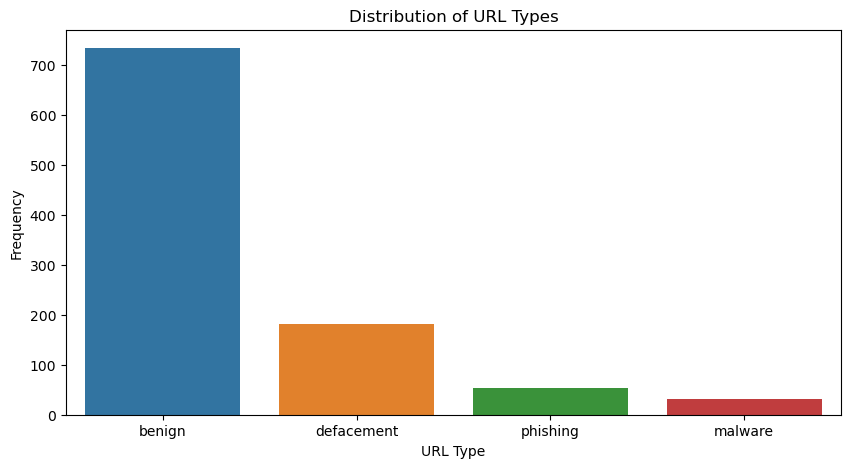

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title("Distribution of URL Types")
plt.xlabel("URL Type")
plt.ylabel("Frequency")
plt.show()

In [13]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokens = [tokenizer.tokenize(url) for url in df['url']]
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokens], maxlen=50, truncating="post", padding="post")


C:\Users\ansh4\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


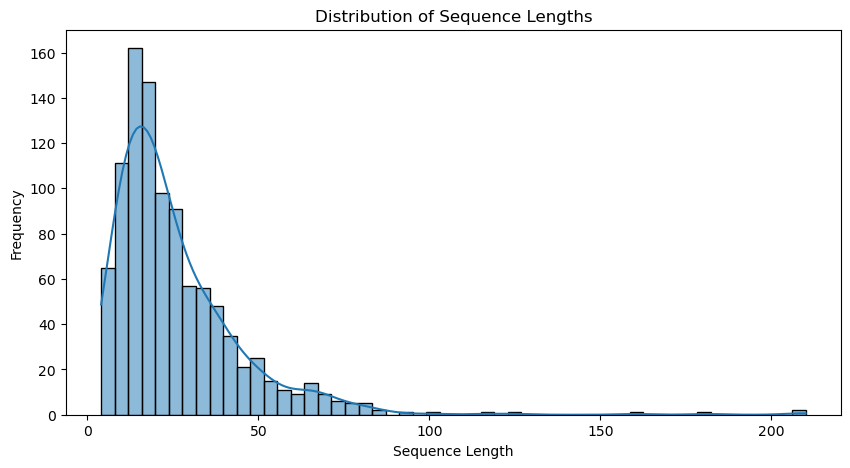

In [14]:
sequence_lengths = [len(tokenizer.tokenize(url)) for url in df['url']]
plt.figure(figsize=(10, 5))
sns.histplot(sequence_lengths, kde=True)
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show()


In [15]:
df['type'] = encoded_data
df

,url,type
0,br-icloud.com.br,3
1,mp3raid.com/music/krizz_kaliko.html,0
2,bopsecrets.org/rexroth/cr/1.htm,0
3,http://www.garage-pirenne.be/index.php?option=...,1
4,http://adventure-nicaragua.net/index.php?optio...,1
...,...,...
995,youtube.com/watch?v=EcGsM-PNQHQ,0
996,bloomberg.com/news/2011-08-28/dust-bowl-in-tex...,0
997,http://www.slavia.sk/home,1
998,innerearbrigade.com/,0


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

<Axes: xlabel='type', ylabel='count'>

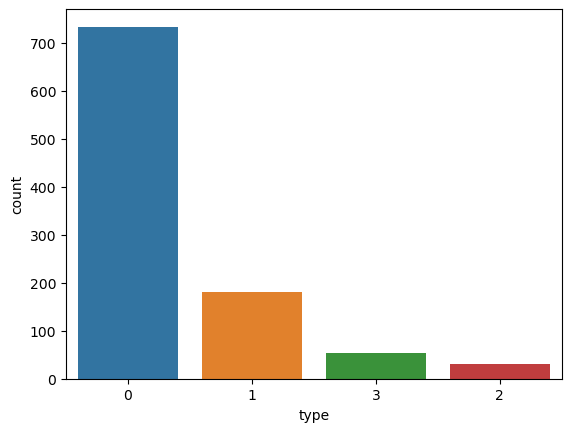

In [17]:
sns.countplot(x = 'type', data = df, order = df['type'].value_counts().index)

In [18]:
from transformers import BertModel, BertTokenizer
import torch

model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')



In [19]:
def extract_features(text):
    input_ids = torch.tensor([tokenizer.encode(text, add_special_tokens=True)])
    with torch.no_grad():
        outputs = model(input_ids)
        hidden_states = outputs[2]
    token_vecs = []
    for layer in range(-4, 0):
        token_vecs.append(hidden_states[layer][0])
    features = []
    for token in token_vecs:
        features.append(torch.mean(token, dim=0))
    return torch.stack(features)

In [20]:
features = []
for i in range(len(df)):
    features.append(extract_features(df.iloc[i]["url"]))
features = torch.cat(features).numpy()

In [21]:
features

array([[ 0.20866221, -0.30191883,  0.08405148, ..., -0.6917093 ,
         0.32647485,  0.46026888],
       [ 0.1642296 , -0.3375747 , -0.01675379, ..., -0.5035049 ,
         0.23100542,  0.6048771 ],
       [ 0.18217364, -0.25289014, -0.0633969 , ..., -0.27169907,
         0.14275008,  0.47711945],
       ...,
       [ 0.5681485 , -0.46876663, -0.29942253, ..., -0.4646421 ,
        -0.07836804, -0.15953957],
       [ 0.632602  , -0.4313939 , -0.37300465, ..., -0.23353867,
        -0.1796664 , -0.16202709],
       [ 0.6228848 , -0.07720749, -0.41445497, ...,  0.06254084,
        -0.20890903, -0.17801066]], dtype=float32)

In [22]:
types = df['type'].values
types

array([3, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 3, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3,
       0, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 3, 3, 0, 0, 0,
       0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 3, 0, 0, 0, 1, 1, 0, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 1, 0, 2, 0,
       0, 2, 0, 0, 3, 0, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [23]:
print(features.shape)
print(types.shape)

(4000, 768)
(1000,)


In [24]:
import numpy as np
features_reshaped = features.reshape((1, -1))

features_reshaped = features_reshaped.reshape(types.shape[0], -1)

In [25]:
features_reshaped.shape

(1000, 3072)

In [26]:
dataset=features_reshaped
dataset

array([[ 0.20866221, -0.30191883,  0.08405148, ...,  0.07490145,
         0.09338007,  0.28850082],
       [ 0.12214136, -0.14043553,  0.5644071 , ...,  0.1211084 ,
        -0.18797356, -0.10648333],
       [ 0.3870683 , -0.01241249,  0.49862355, ..., -0.13929911,
        -0.15056296,  0.12027898],
       ...,
       [ 0.3193683 , -0.52491605,  0.2933741 , ..., -0.11866748,
        -0.66254383,  0.10896002],
       [ 0.66745096, -0.7251581 ,  0.37217614, ..., -0.31110838,
        -0.12280738,  0.22292754],
       [ 0.43090597, -0.4179534 ,  0.0405671 , ...,  0.06254084,
        -0.20890903, -0.17801066]], dtype=float32)

In [27]:
dataset.shape

(1000, 3072)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

In [30]:
import pandas as pd

if pd.api.types.is_numeric_dtype(y_train):
  print("y_train might contain continuous labels.")
else:
  print("y_train likely contains categorical labels.")

y_train might contain continuous labels.


In [31]:
bins = pd.cut(y_train, 3, labels=["Low", "Medium", "High"])
y_train_categorical = bins

In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train_categorical)

y_train_s = pd.Series(y_train)
y_train_res = pd.Series (y_train_res)
print('Class distribution before resampling:', y_train_s.value_counts())
print('Class distribution after resampling:', y_train_res.value_counts())

Class distribution before resampling:  0.321570    2
 0.011010    1
 0.123537    1
-0.086188    1
 0.724795    1
            ..
-0.143904    1
-0.068292    1
 0.350065    1
-0.023682    1
-0.042334    1
Name: count, Length: 799, dtype: int64
Class distribution after resampling: Low       445
Medium    445
High      445
Name: count, dtype: int64


In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train_categorical)



C:\Users\ansh4\anaconda3\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
bins = pd.cut(y_test, 3, labels=["Low", "Medium", "High"])
y_test_categorical = bins

In [35]:
score = clf.score(X_test, y_test_categorical)
print("Accuracy:", score)

Accuracy: 0.74


In [36]:
y_pred = clf.predict(X_test)
type(X_test)
X_test.shape

(200, 3071)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
cm = confusion_matrix(y_test_categorical, y_pred)
cr = classification_report(y_test_categorical, y_pred)

In [39]:
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 2  0 12]
 [ 0 49  7]
 [ 0 33 97]]


In [40]:
print("\nClassification Report:\n", cr)


Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.14      0.25        14
         Low       0.60      0.88      0.71        56
      Medium       0.84      0.75      0.79       130

    accuracy                           0.74       200
   macro avg       0.81      0.59      0.58       200
weighted avg       0.78      0.74      0.73       200

